In [1]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [2]:
using Newtrinos 

In [3]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(ordering=:NO),
    #flavour=Newtrinos.osc.ThreeFlavour(ordering=:IO),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction = Newtrinos.osc.SI(),
)
osc = Newtrinos.osc.configure(osc_cfg)
physics = (; osc);

In [7]:
experiments = (;
    tao = Newtrinos.tao.configure(physics),
    juno = Newtrinos.juno.configure(physics, livetime_years=15), #e.g.
);
p = Newtrinos.get_params(experiments);

[ Info: Loading TAO data
[ Info: Loading juno data


In [8]:
sm_juno_for_data = Newtrinos.juno.configure(physics, livetime_years=15) 
sm_asimov_data = Newtrinos.generate_asimov_data(sm_juno_for_data);
sm_toy_data = Newtrinos.generate_asimov_data(sm_juno_for_data);

[ Info: Loading juno data


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/6KcTF/src/scenes.jl:238


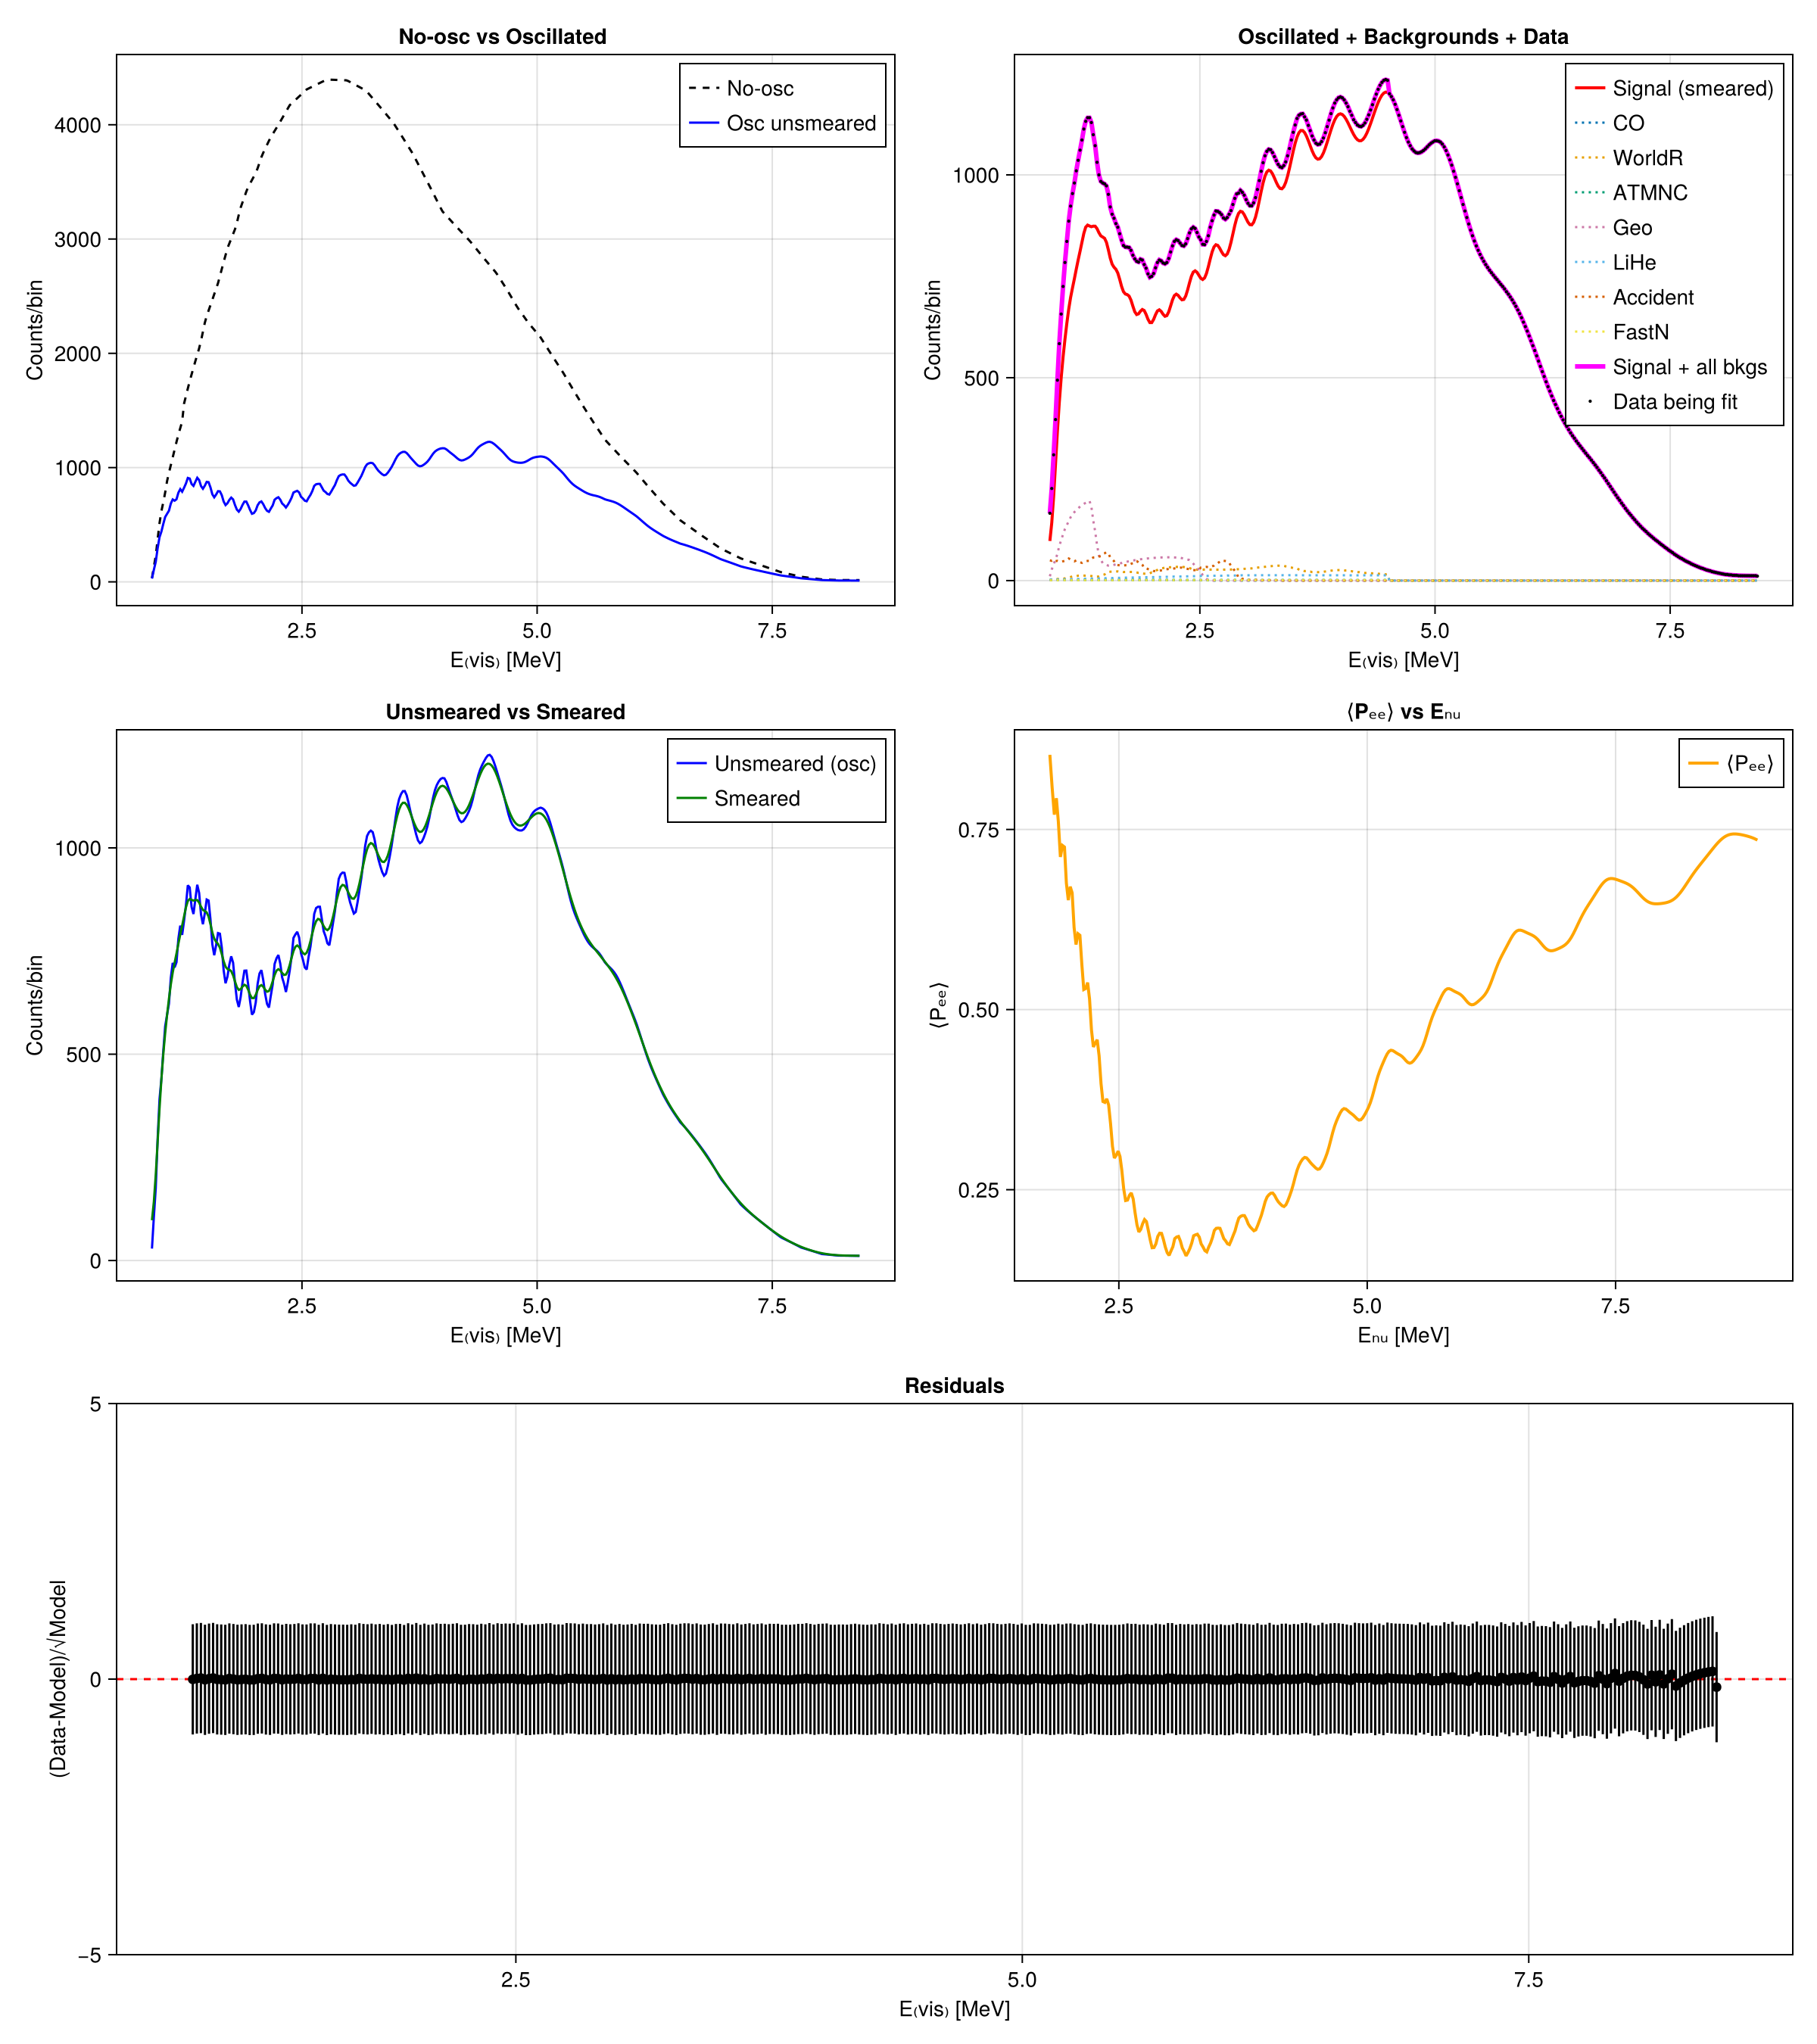

In [9]:
experiments.juno.plot(p; data_to_plot=sm_asimov_data)

In [10]:
sm_tao_for_data = Newtrinos.tao.configure(physics)
sm_asimov_data_tao = Newtrinos.generate_asimov_data(sm_tao_for_data);

[ Info: Loading TAO data


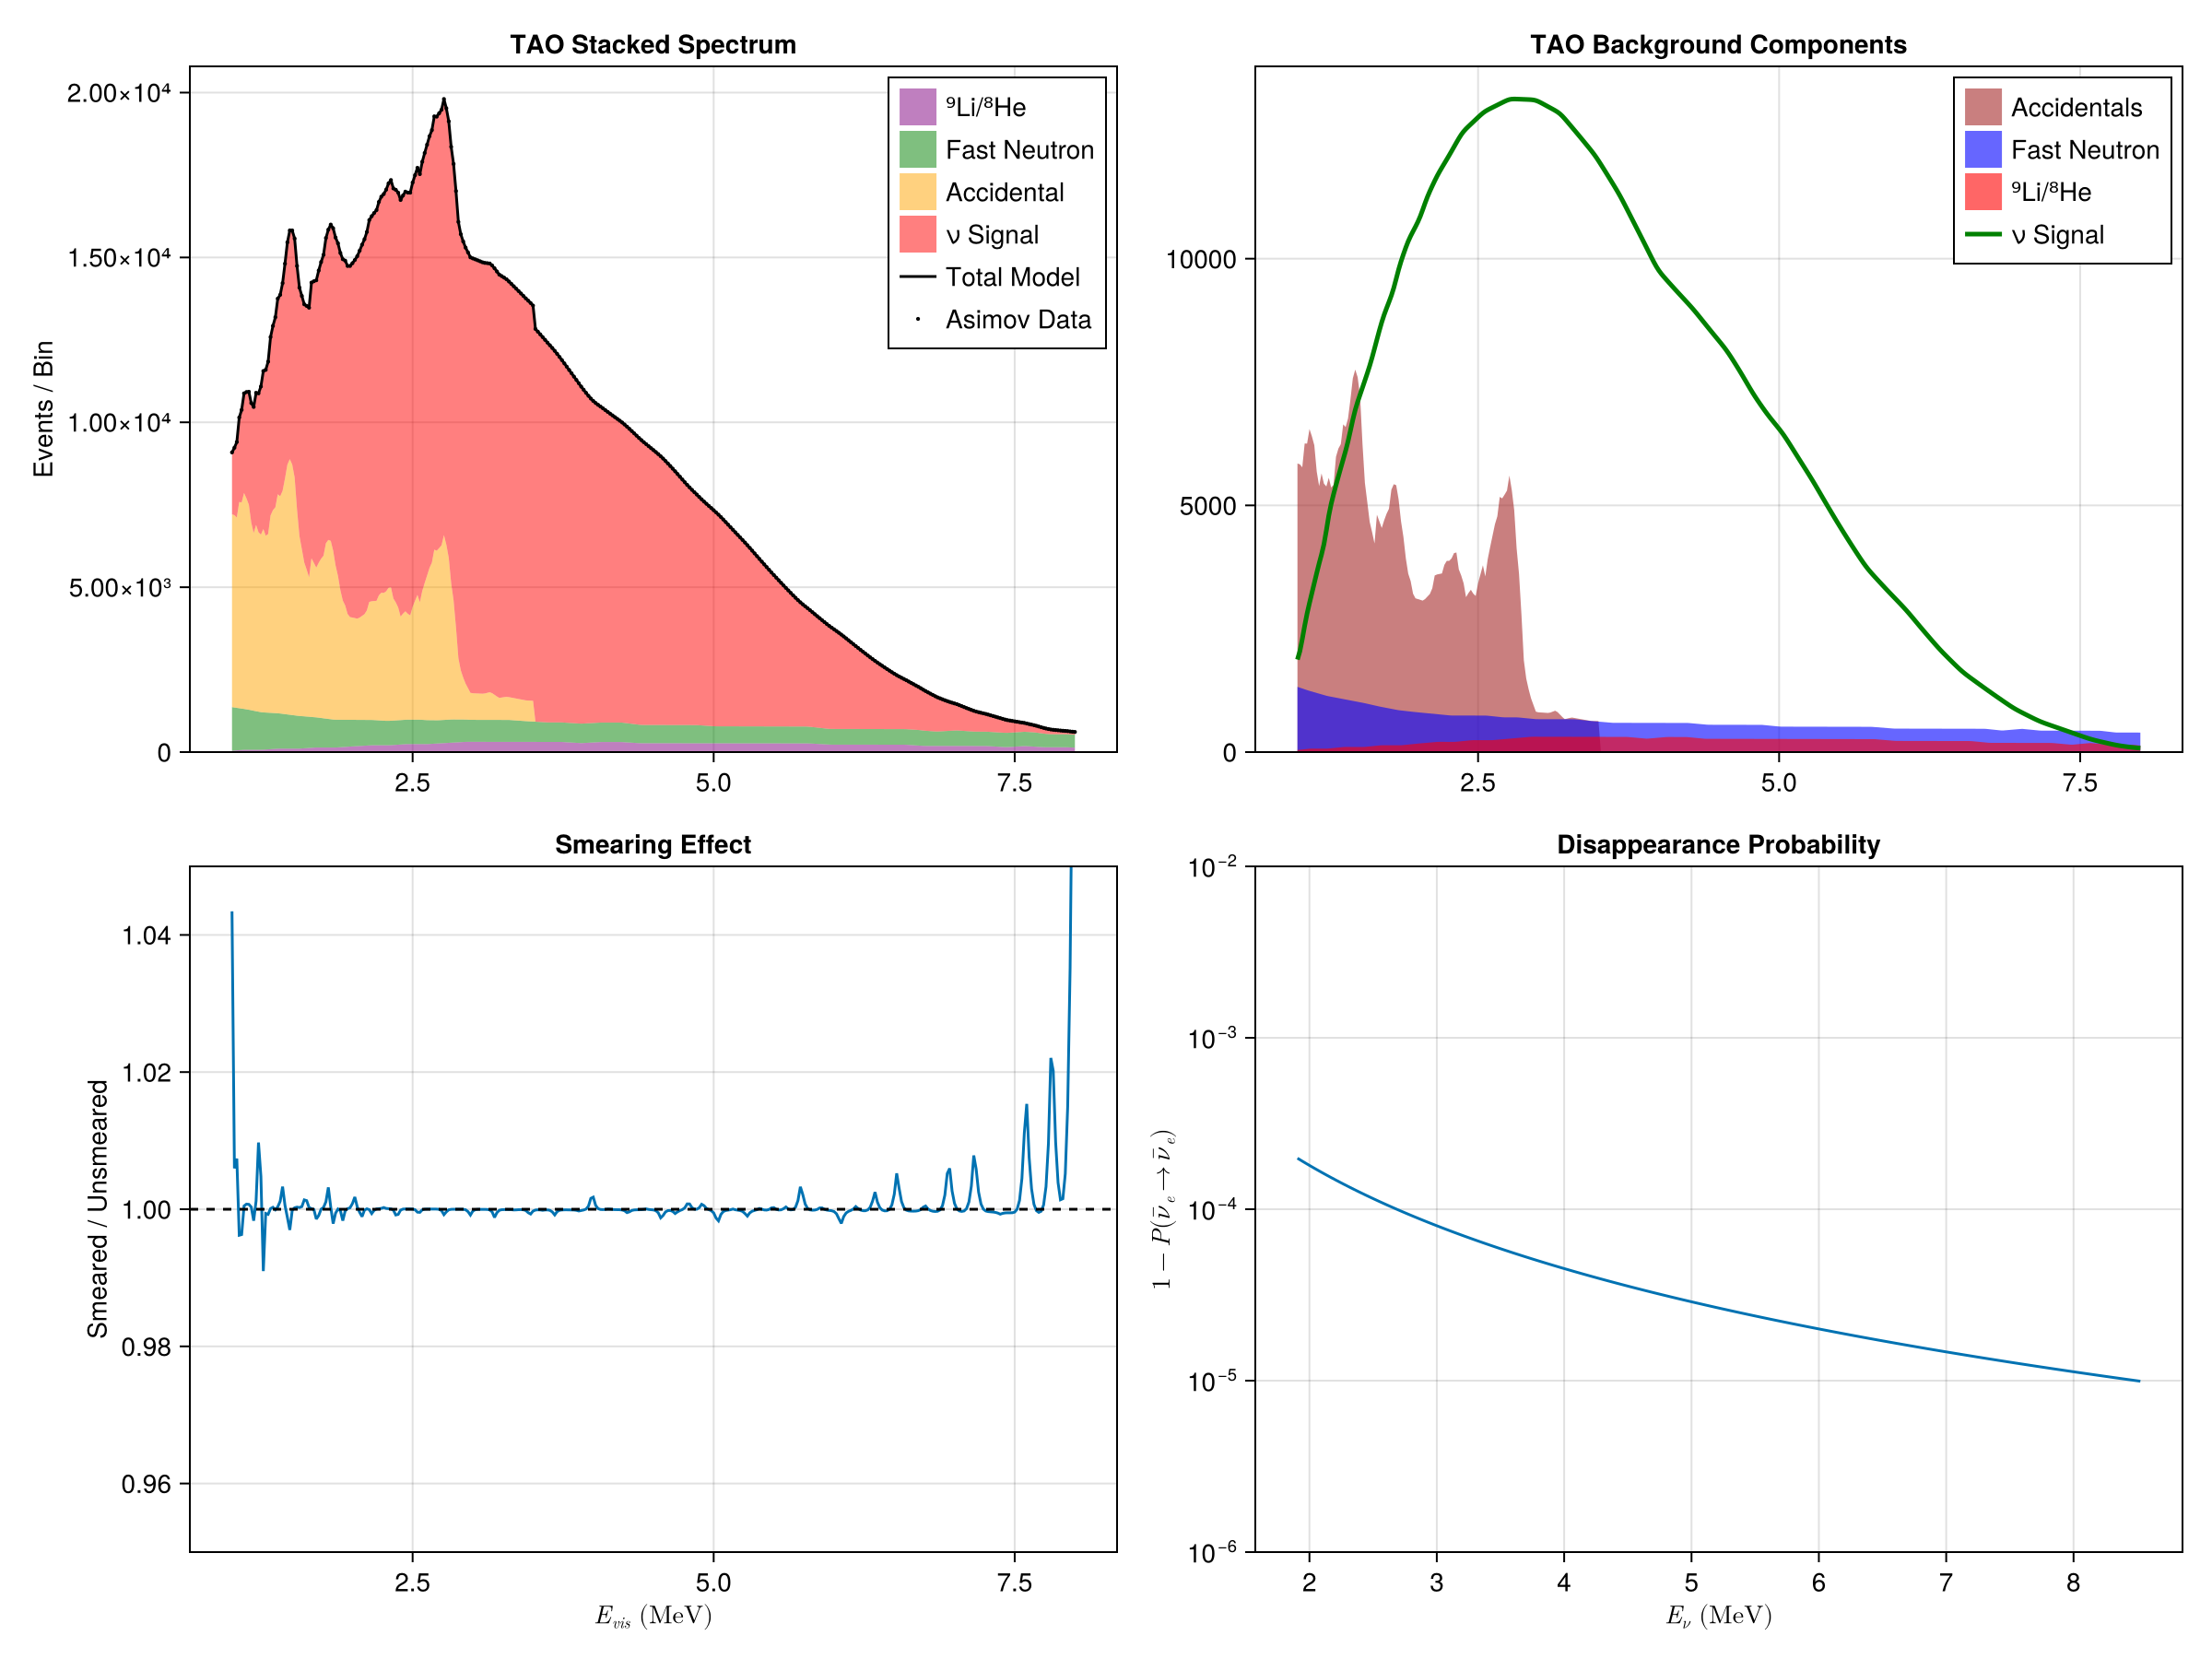

In [11]:
experiments.tao.plot(p; data_to_plot=sm_asimov_data_tao)